# Cross Validation Workshop

# Objectives: 
1. SWBAT explain the importance and motivations behind cross-validation 
1. SWBAT perform a train_test_split in order to create train and holdout sets
1. SWBAT use KFold cross-validation IOT estimate the test error for different values of k in a KNN algorithm

In [22]:
#Let's take care of our imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.datasets import load_breast_cancer, load_diabetes

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

# The Constant Battle 

<img src="images/bv_tradeoff.png" style="height: 600px;" align='center'>


>Our goal is to maximize performance on unseen data

# Motivations
Rarely do we have a wealth of test ("unseen") data! 



**Cross-validation allows us to:**

> Use available training data IOT estimate performance on unseen data

This helps us compare methods and tune hyper parameters within our chosen method 
    *(for example: number of nearest neighbors in a KNN algorithm)*

## Validation Set Approach 

<img src="images/val_splits.png" style="width: 900px;" align='center'>

## Validation Set Approach 

<img src="images/val_splits_full.png" style="width: 900px;" align='center'>




<br/>
<br/>
<br/>
All the same idea: 
    
   >All data >> Train/Validation/Test
   
   >All data >> Train/Test/Holdout
   
   >All data >> Train/Validation/Holdout
    

# Validation Set Approach 

<img src="images/ttsplit_1.png" style="height: 600px;" align='center'>

# Validation Set Approach 

<img src="images/ttsplit_2.png" style="height: 600px;" align='center'>

# Train-test-split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

```
from sklearn.model_selection import train_test_split

```

In [23]:
#Let's load in the diabetes dataset

data = load_diabetes()
X = data.data
y = data.target
feat_names = data.feature_names

print(f'Number of Observations: {y.shape[0]}')
print(f'Number of Features: {X.shape[1]}')
print(f'\nFeatures: {feat_names}')

Number of Observations: 442
Number of Features: 10

Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


# Train-test-split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Important:** Always check the shapes of your new sets!  

In [25]:
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}')
print(f'y_train: {y_train.shape},    y_test: {y_test.shape}')

X_train: (353, 10), X_test: (89, 10)
y_train: (353,),    y_test: (89,)


# Example in Action:

In [26]:
k_neighbs = np.arange(1, 41, 2) #test out different ks

train_mses = np.empty(len(k_neighbs)) #placeholder for train scores
test_mses = np.empty(len(k_neighbs))  #placeholder for test scores

In [27]:
for idx, k in enumerate(k_neighbs):
    knn = KNeighborsRegressor(n_neighbors=k, n_jobs = -1).fit(X_train, y_train) #train on X_train, y_train
    yhat_train, yhat_test = knn.predict(X_train), knn.predict(X_test)
    train_mses[idx] = mean_squared_error(y_train, yhat_train)
    test_mses[idx] = mean_squared_error(y_test, yhat_test)

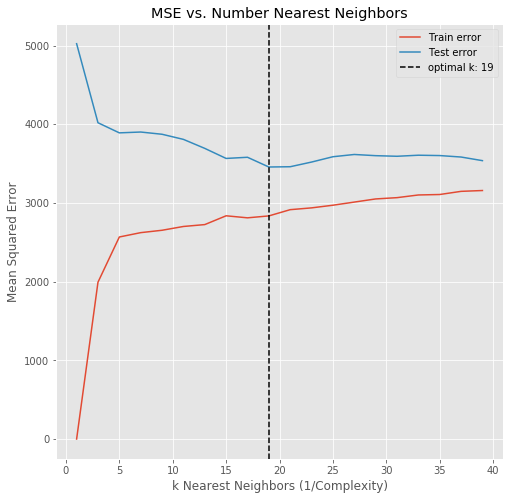

In [28]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(n_neighbs, train_mses, label = 'Train error')
ax.plot(n_neighbs, test_mses, label = 'Test error')

min_mse_test = n_neighbs[np.argmin(test_mses)]
ax.axvline(min_mse_test, linestyle = 'dashed', label = f'optimal k: {min_mse_test}', color = 'k')
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('k Nearest Neighbors (1/Complexity)')
ax.set_title('MSE vs. Number Nearest Neighbors')
ax.legend();

# Example in Action:

<img src="images/knnreg_mse_vs_ks.jpg" style="width: 900px;" align='center'>

# Validation Set Approach



**Drawbacks:**
* Results may be highly dependent on how original data was split, but we don't have any information on that source of variability! 

# Cross-validation


* Check out other CV options: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators
> ex: Stratified KFold preserves class balance

* Grid Search techniques: https://scikit-learn.org/stable/modules/grid_search.html
> For exploring hyperparameter space

* Sklearn Optimize: https://scikit-optimize.github.io/stable/
> Another approach to exploring parameter space


# KFold Cross Validation


<img src="images/kfold.png" style="height: 700px;" align='center'>


<br />
<br />

1. Randomly divide observations into K groups or "Folds"
1. One fold treated as the test set, and model is fit on the remaining k-1 folds
1. Error is computed on the test fold
1. Process repeated k times, each time a different fold acts as the "test set"
1. Result: k estimates of the test error --> averaged


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html



# Example in Action: 

Continue with the Diabetes Dataset

In [29]:
print(f'X_Train: {X_train.shape}, y_train: {y_train.shape}')

X_Train: (353, 10), y_train: (353,)


# Example in Action: 

In [30]:
#instantiate KFold
kf = KFold(n_splits=5, shuffle=False) #note - you will actually want to set shuffle = True!

In [31]:
for train_index, test_index in kf.split(X_train):
    print("\n\n TEST:", test_index, "\n TRAIN:", train_index)



 TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70] 
 TRAIN: [ 71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 25

#### Let's functionalize this so that we can eventually look at different k's


In [32]:
def calc_kfold_metrics(X, y, estimator, n_splits=5, metric=mean_squared_error):
    kf = KFold(n_splits=n_splits, shuffle=True)
    
    train_mses = np.empty(kf.n_splits) #placeholder for the calculated kfold mses
    test_mses = np.empty(kf.n_splits)
    
    for idx, (train_index, test_index) in enumerate(kf.split(X=X)):
        
        X_train_folds, y_train_folds = X[train_index], y[train_index]
        X_test_fold, y_test_fold = X[test_index], y[test_index]

        
        model = estimator.fit(X_train_folds, y_train_folds)

        train_mse = mean_squared_error(y_train_folds, model.predict(X_train_folds))
        train_mses[idx] = train_mse

        test_mse = mean_squared_error(y_test_fold, model.predict(X_test_fold))
        test_mses[idx] = test_mse

    return train_mses, test_mses

In [33]:
train_mses, test_mses = calc_kfold_metrics(X, y, estimator = KNeighborsRegressor(n_neighbors=11))
print(f'Avg Train MSE: {int(np.mean(train_mses))}')
print(f'Avg Test MSE: {int(np.mean(test_mses))}')

Avg Train MSE: 2808
Avg Test MSE: 3391


In [34]:
#function for testing different ks

def kfold_knn_tuning(ks, X, y, n_splits=5, metric=mean_squared_error):
    
    train_mses = np.empty((len(ks),n_splits))
    test_mses = np.empty((len(ks), n_splits))
    
    for idx, k in enumerate(ks):
        train_err, test_err = calc_kfold_metrics(X, y, n_splits = n_splits, 
                                                 estimator = KNeighborsRegressor(n_neighbors = k))
        train_mses[idx, :] = train_err
        test_mses[idx, :] = test_err      
    return train_mses, test_mses

In [41]:
ks = ks = np.arange(1, 25, 2)
train_mses, test_mses = kfold_knn_tuning(ks, X_train, y_train)

In [42]:
#function for plotting the kfold tuning process

def plot_knn_tuning(ax, ks, X, y, n_splits=5, metric=mean_squared_error):
    train_mses, test_mses = kfold_knn_tuning(ks, X_train, y_train)
    avg_test = np.mean(test_mses, axis = 1)
    
    ax.plot(ks, test_mses, color = 'cornflowerblue')
    ax.plot(ks, avg_test, color = 'k', label = 'Average Test Error \n (across folds)')
    ax.set_ylabel('Test '+ metric.__name__)
    ax.set_xlabel('K Nearest Neighbors')
    ax.set_title('Kfold Cross Validation: KNN Tuning')
    
    optimal_k = ks[np.argmin(avg_test)]
    ax.axvline(optimal_k, linestyle = 'dashed', color = 'k', label = f'optimal k: {optimal_k}')
    ax.legend(fontsize = 12)

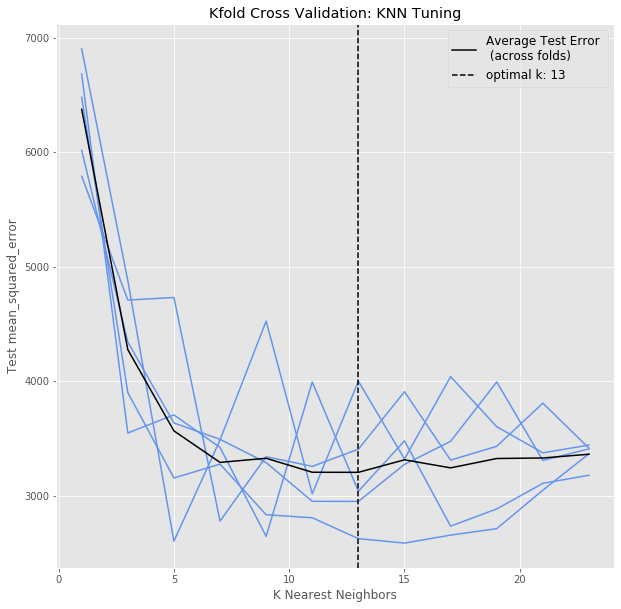

In [47]:
fig, ax = plt.subplots(figsize = (10,10))
plot_knn_tuning(ax, ks, X_train, y_train)
# fig.savefig('images/knn_tuning_kfold.png')

# Results from KFold CV 

<img src="images/knn_tuning_kfold.png" style="height: 800px;" align='center'>

<br/>
<br/>
<br/>
<br/>
<br/>

Why might this be more powerful than the simple validation set approach?

# Last step: report holdout metric! 

Use original holdout data from train_test_split


In [18]:
holdout_score = mean_squared_error(y_test, KNeighborsRegressor(13).fit(X_train, y_train).predict(X_test))

In [20]:
print(f'Holdout MSE: {int(holdout_score)}')

Holdout MSE: 3652


# Check for Understanding 

* My model performs really well on my training data, but when I try to predict on new data it is horrible!  What's going on? 

* What are the benefits of using cross-validation? 

* I plan to use cross validation to estimate my test error.  Should I still perform a train_test_split? 

# Other Resources

* Check out other CV options: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators
> ex: Stratified KFold preserves class balance

* Grid Search techniques: https://scikit-learn.org/stable/modules/grid_search.html
> For exploring hyperparameter space

* Sklearn Optimize: https://scikit-optimize.github.io/stable/
> Another approach to exploring parameter space

# Your Task


Tune a knn on sklearn's breast cancer dataset (starter code provided). 

Hints: 
> * Can you use the same metric? Why or why not? 
> * Create a hold out set for the very end! 
> * In your train_test_split, consider using stratify = y to preserve class balance


# Questions? 

In [3]:
#don't change


from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
        "rise",
        {
            "theme": "moon",
            "transition": "fade",
            "start_slideshow_at": "selected",
            "autolaunch": False,
            "width": "100%",
            "height": "100%",
            "header": "",
            "footer":"",
            "scroll": True,
            "enable_chalkboard": True,
            "slideNumber": True,
            "center": False,
            "controlsLayout": "edges",
            "slideNumber": True,
            "hash": True,
        }
    )

In [51]:
jupyter nbextension enable splitcell/splitcell

SyntaxError: invalid syntax (<ipython-input-51-b4f3ee2bbd9b>, line 1)